In [19]:
from qiskit import qasm2
from qiskit import QuantumRegister, QuantumCircuit

filepath = "./benchmark/sabre_CXonly_bench/large/radd_250_CXonly.qasm"
circ = qasm2.load(filepath)

print(circ.qubits)
print(dict(circ.count_ops()))
print("initial circuit: ")
# circ.draw(output='mpl')
# circ.draw(output='mpl', filename='circuit.png')

[Qubit(QuantumRegister(16, 'q'), 0), Qubit(QuantumRegister(16, 'q'), 1), Qubit(QuantumRegister(16, 'q'), 2), Qubit(QuantumRegister(16, 'q'), 3), Qubit(QuantumRegister(16, 'q'), 4), Qubit(QuantumRegister(16, 'q'), 5), Qubit(QuantumRegister(16, 'q'), 6), Qubit(QuantumRegister(16, 'q'), 7), Qubit(QuantumRegister(16, 'q'), 8), Qubit(QuantumRegister(16, 'q'), 9), Qubit(QuantumRegister(16, 'q'), 10), Qubit(QuantumRegister(16, 'q'), 11), Qubit(QuantumRegister(16, 'q'), 12), Qubit(QuantumRegister(16, 'q'), 13), Qubit(QuantumRegister(16, 'q'), 14), Qubit(QuantumRegister(16, 'q'), 15)]
{'cx': 1405}
initial circuit: 


In [20]:
from qiskit.transpiler.layout import Layout

# layout = Layout.generate_trivial_layout(circ.qubits)
# print(layout)

physical nodes: 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 

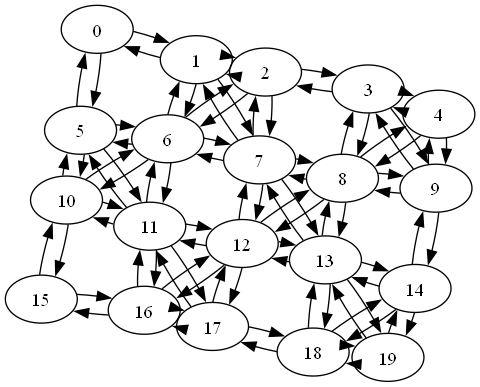

In [21]:
from utils import BACKENDS
from qiskit.transpiler import CouplingMap

backend = "tokyo"
coupling_map = CouplingMap(couplinglist=BACKENDS[backend].edges())
coupling_map.make_symmetric()

print(f"physical nodes:", end=' ')
for p in coupling_map.physical_qubits:
    print(p, end='. ')

coupling_map.draw()

In [22]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import (
    TrivialLayout,
    DenseLayout,
    SabreLayout
)
from layout.layout_018 import Layout_018
from qiskit.transpiler.passes import (
    BasicSwap,
    LookaheadSwap,
    SabreSwap,
    StochasticSwap
)
from routing.sqgm_swap import SQGMSwap
from routing.routing_018 import Routing_018

from qiskit.transpiler.passes import (
    FullAncillaAllocation,
    EnlargeWithAncilla,
    ApplyLayout
)

bs = BasicSwap(coupling_map)
basic_manager = PassManager([
    SabreSwap(coupling_map),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    bs
])
print("run basic_manager 前:")
print(basic_manager.property_set)
basic_circ = basic_manager.run(circ)

sabre_swap = SabreSwap(coupling_map)
sabre_manager = PassManager([
    SabreSwap(coupling_map),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    sabre_swap
])
sabre_circ = sabre_manager.run(circ)

sqgm_swap = SQGMSwap(coupling_map)
sqgm_manager = PassManager([
    SabreSwap(coupling_map),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    sqgm_swap
])
sqgm_circ = sqgm_manager.run(circ)

stochastic_swap = StochasticSwap(coupling_map)
stochastic_manager = PassManager([
    SabreSwap(coupling_map),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    stochastic_swap
])
stochastic_circ = stochastic_manager.run(circ)



run basic_manager 前:
{}


TranspilerError: 'Fewer qubits in the circuit (16) than the coupling map (20). Have you run a layout pass and then expanded your DAG with ancillas? See `FullAncillaAllocation`, `EnlargeWithAncilla` and `ApplyLayout`.'

In [ ]:
routing_018 = Routing_018(coupling_map)
routing018_manager = PassManager([
    Layout_018(coupling_map),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    routing_018
])
routing018_circ = routing018_manager.run(circ)

layout 018: Layout({
3: Qubit(QuantumRegister(16, 'q'), 0),
5: Qubit(QuantumRegister(16, 'q'), 1),
9: Qubit(QuantumRegister(16, 'q'), 2),
10: Qubit(QuantumRegister(16, 'q'), 3),
14: Qubit(QuantumRegister(16, 'q'), 4),
2: Qubit(QuantumRegister(16, 'q'), 5),
13: Qubit(QuantumRegister(16, 'q'), 6),
8: Qubit(QuantumRegister(16, 'q'), 7),
1: Qubit(QuantumRegister(16, 'q'), 8),
7: Qubit(QuantumRegister(16, 'q'), 9),
6: Qubit(QuantumRegister(16, 'q'), 10),
12: Qubit(QuantumRegister(16, 'q'), 11),
11: Qubit(QuantumRegister(16, 'q'), 12),
16: Qubit(QuantumRegister(16, 'q'), 13),
17: Qubit(QuantumRegister(16, 'q'), 14),
18: Qubit(QuantumRegister(16, 'q'), 15)
})
routing 018 layout: None
{'layout': Layout({
3: Qubit(QuantumRegister(16, 'q'), 0),
5: Qubit(QuantumRegister(16, 'q'), 1),
9: Qubit(QuantumRegister(16, 'q'), 2),
10: Qubit(QuantumRegister(16, 'q'), 3),
14: Qubit(QuantumRegister(16, 'q'), 4),
2: Qubit(QuantumRegister(16, 'q'), 5),
13: Qubit(QuantumRegister(16, 'q'), 6),
8: Qubit(QuantumRe

AttributeError: 'Routing_018' object has no attribute 'applied_predecessors'

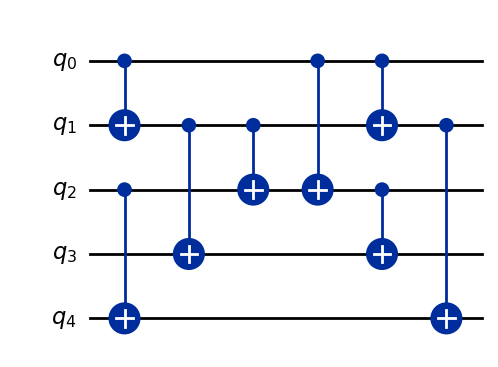

In [ ]:
circ.draw(output='mpl')

run basic manager 後:
{'layout': Layout({
2: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
4: Qubit(QuantumRegister(5, 'q'), 3),
0: Qubit(QuantumRegister(5, 'q'), 4)
}), 'final_layout': Layout({
4: Qubit(QuantumRegister(5, 'q'), 4),
2: Qubit(QuantumRegister(5, 'q'), 3),
0: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 2),
3: Qubit(QuantumRegister(5, 'q'), 1)
})}


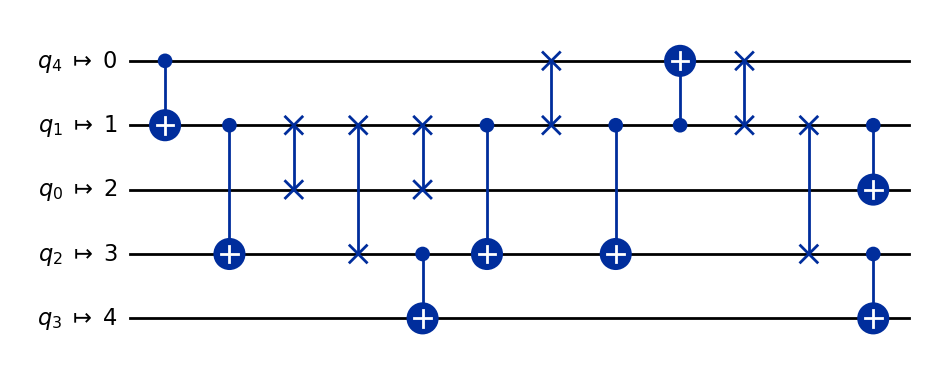

In [ ]:
print("run basic manager 後:")
print(basic_manager.property_set)
# print(basic_manager.draw())
basic_circ.draw(output='mpl')   # stable

run lookahead manager 後:
{'layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
2: Qubit(QuantumRegister(5, 'q'), 3),
4: Qubit(QuantumRegister(5, 'q'), 4)
}), 'final_layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 0),
4: Qubit(QuantumRegister(5, 'q'), 3),
3: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 1),
2: Qubit(QuantumRegister(5, 'q'), 4)
})}


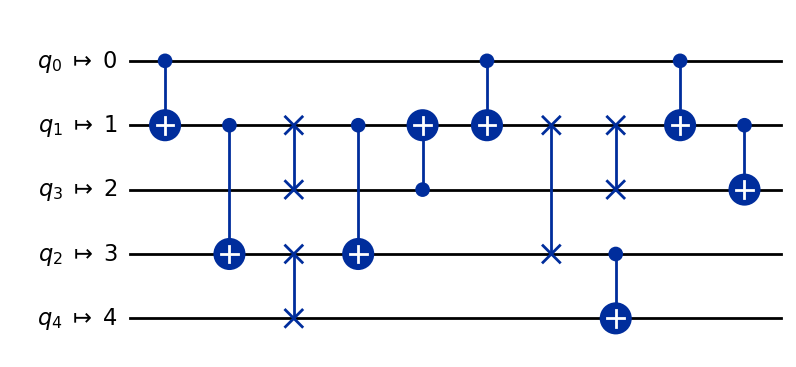

In [ ]:
print("run lookahead manager 後:")
print(lookahead_manager.property_set)
lookahead_circ.draw(output='mpl')   # stable

run sabre manager 後:
{'layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
2: Qubit(QuantumRegister(5, 'q'), 3),
4: Qubit(QuantumRegister(5, 'q'), 4)
}), 'final_layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 0),
3: Qubit(QuantumRegister(5, 'q'), 1),
2: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 3),
4: Qubit(QuantumRegister(5, 'q'), 4)
})}


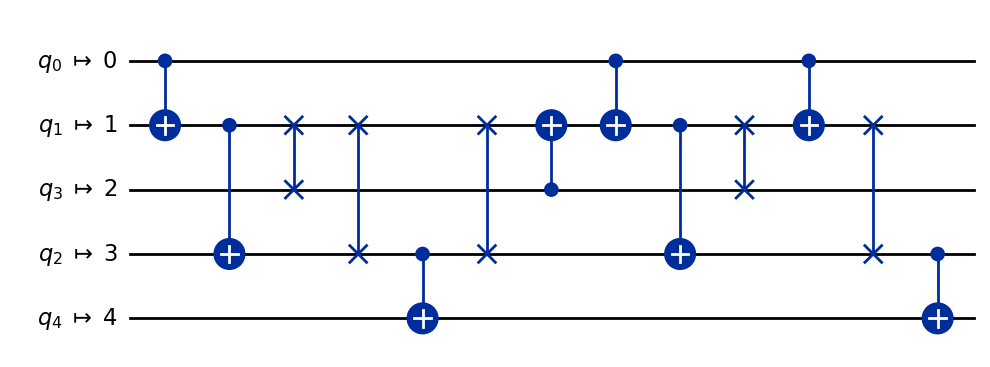

In [ ]:
print("run sabre manager 後:")
print(sabre_manager.property_set)
sabre_circ.draw(output='mpl')   # unstable (?)

run sqgm manager 後:
{'layout': Layout({
2: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
0: Qubit(QuantumRegister(5, 'q'), 3),
4: Qubit(QuantumRegister(5, 'q'), 4)
}), 'final_layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 2),
4: Qubit(QuantumRegister(5, 'q'), 3),
3: Qubit(QuantumRegister(5, 'q'), 4),
2: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1)
})}


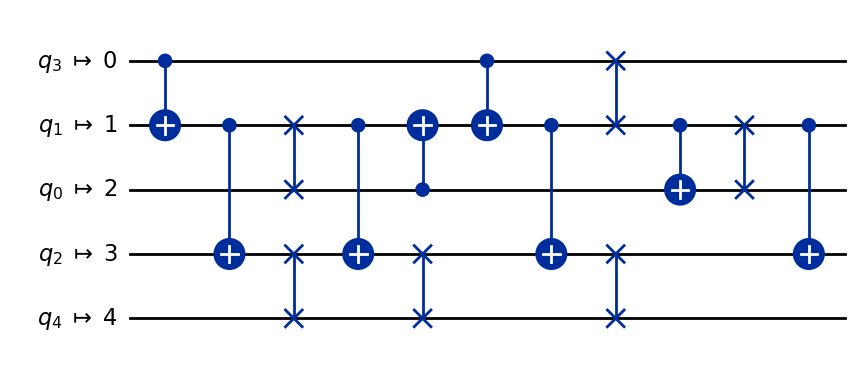

In [ ]:
print("run sqgm manager 後:")
print(sqgm_manager.property_set)
sqgm_circ.draw(output='mpl')    # unstable (?)

run stochastic manager 後:
{'layout': Layout({
2: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
0: Qubit(QuantumRegister(5, 'q'), 3),
4: Qubit(QuantumRegister(5, 'q'), 4)
}), 'final_layout': Layout({
0: Qubit(QuantumRegister(5, 'q'), 0),
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
4: Qubit(QuantumRegister(5, 'q'), 3),
2: Qubit(QuantumRegister(5, 'q'), 4)
})}


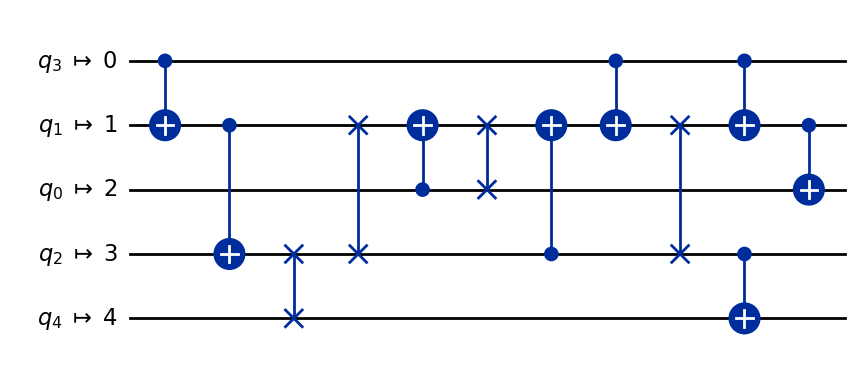

In [ ]:
print("run stochastic manager 後:")
print(stochastic_manager.property_set)
sqgm_circ.draw(output='mpl')    # unstable (?)
stochastic_circ.draw(output='mpl')